In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
SEED = 12

stick_style = [
    {
        "selector": "thead th",
        "props": [
            ("position", "sticky"),
            ("top", "0"),
            ("background-color", "gray"),
        ],
    },
    {
        "selector": "tbody th",
        "props": [
            ("position", "sticky"),
            ("left", "0"),
            ("background-color", "gray"),
        ],
    },
]

In [5]:
def fit_predict(data_split, cb_params = dict()):
    X_train, X_test, X_val, y_train, y_test, y_val = data_split

    cat_cols = X_train.select_dtypes("object").columns.to_list()

    cb_def_params = {
        "iterations": 10_000,
        "learning_rate": 0.001,
        "max_depth": 6,
        "cat_features": cat_cols,
        "verbose": 500,
        "random_seed": SEED,
        "early_stopping_rounds": 200,
    }

    cb1_params = {**cb_def_params, **cb_params}

    model = CatBoostClassifier(**cb1_params)
    model.fit(X_train, y_train, use_best_model=True, eval_set=(X_val, y_val))

    predictions = model.predict(X_test)
    y_test_coded = (y_test == "Yes").astype(int)
    predictions_coded = (predictions == "Yes").astype(int)

    f1 = f1_score(y_test_coded, predictions_coded)

    return model, f1

In [6]:
df = pd.read_csv(
    "./Telco Customer Churn.csv",
    dtype={"TotalCharges": np.float32},
    na_values=[" ", ""],
    usecols=lambda col: col not in ["customerID"],
)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [7]:
df.shape

(7043, 20)

In [4]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df.TotalCharges.fillna(0.0)

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32

In [38]:
y = df.Churn
X = df.drop('Churn', axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [41]:
model, f1 = fit_predict([X_train, X_test, X_val, y_train, y_test, y_val])
print(f"f1: {f1:.4f}")

0:	learn: 0.6924821	test: 0.6925109	best: 0.6925109 (0)	total: 13.3ms	remaining: 2m 12s
500:	learn: 0.5050892	test: 0.5076653	best: 0.5076653 (500)	total: 1.73s	remaining: 32.9s
1000:	learn: 0.4489287	test: 0.4532073	best: 0.4532073 (1000)	total: 3.51s	remaining: 31.5s
1500:	learn: 0.4266576	test: 0.4329617	best: 0.4329617 (1500)	total: 5.18s	remaining: 29.3s
2000:	learn: 0.4149300	test: 0.4239893	best: 0.4239893 (2000)	total: 6.92s	remaining: 27.6s
2500:	learn: 0.4075982	test: 0.4194022	best: 0.4194022 (2500)	total: 8.7s	remaining: 26.1s
3000:	learn: 0.4027418	test: 0.4169130	best: 0.4169130 (3000)	total: 10.5s	remaining: 24.5s
3500:	learn: 0.3991085	test: 0.4154328	best: 0.4154328 (3500)	total: 12.3s	remaining: 22.9s
4000:	learn: 0.3962822	test: 0.4145299	best: 0.4145295 (3998)	total: 14.1s	remaining: 21.2s
4500:	learn: 0.3939026	test: 0.4139810	best: 0.4139772 (4499)	total: 15.9s	remaining: 19.5s
5000:	learn: 0.3917718	test: 0.4134934	best: 0.4134934 (5000)	total: 17.8s	remaining: 1

---

### Use standartization for numerical features

In [42]:
num_cols = X.select_dtypes('number').columns.to_list()

In [43]:
scaler = StandardScaler().fit(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [ ]:
model2, f12 = fit_predict([X_train, X_test, X_val, y_train, y_test, y_val])
print(f"f1: {f12:.4f}")

0:	learn: 0.6924821	test: 0.6925051	best: 0.6925051 (0)	total: 14.5ms	remaining: 2m 25s
500:	learn: 0.5050892	test: 0.5433888	best: 0.5433888 (500)	total: 1.72s	remaining: 32.7s
1000:	learn: 0.4489287	test: 0.5082266	best: 0.5082266 (1000)	total: 3.45s	remaining: 31s
1500:	learn: 0.4266576	test: 0.4914929	best: 0.4914929 (1500)	total: 5.15s	remaining: 29.1s
2000:	learn: 0.4149300	test: 0.4865761	best: 0.4865556 (1986)	total: 6.92s	remaining: 27.7s
2500:	learn: 0.4075982	test: 0.4855373	best: 0.4853804 (2398)	total: 8.78s	remaining: 26.3s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4853804275
bestIteration = 2398

Shrink model to first 2399 iterations.
f1: 0.6299


In [45]:
(f12 - f1) / f1 * 100

5.053525681612293

Conclusion: we've got increase for 5% of f1 score

---

### Work with features

<Axes: ylabel='None'>

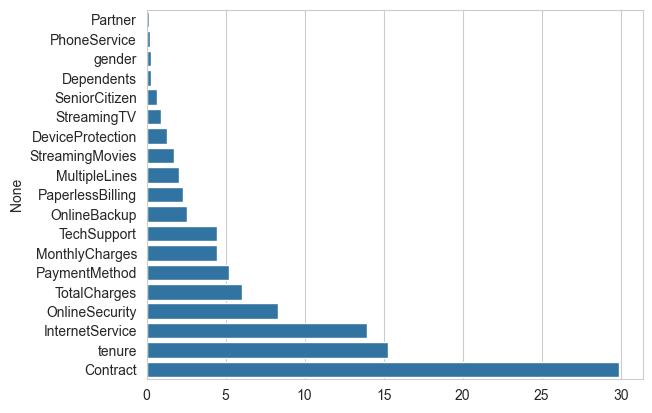

In [35]:
sorted_idx = np.argsort(model2.feature_importances_)
sns.barplot(x=model2.feature_importances_[sorted_idx], y=X.columns[sorted_idx])

In [53]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [62]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

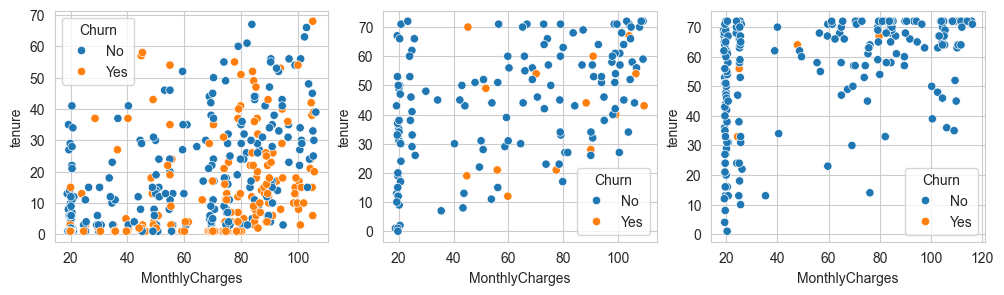

In [67]:
plot_samples = df.sample(750)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
sns.scatterplot(
    plot_samples[plot_samples.Contract == "Month-to-month"],
    x="MonthlyCharges",
    y="tenure",
    hue="Churn",
    ax=ax[0],
)
sns.scatterplot(
    plot_samples[plot_samples.Contract == "One year"],
    x="MonthlyCharges",
    y="tenure",
    hue="Churn",
    ax=ax[1],
)
sns.scatterplot(
    plot_samples[plot_samples.Contract == "Two year"],
    x="MonthlyCharges",
    y="tenure",
    hue="Churn",
    ax=ax[2],
)

<Axes: xlabel='Contract', ylabel='count'>

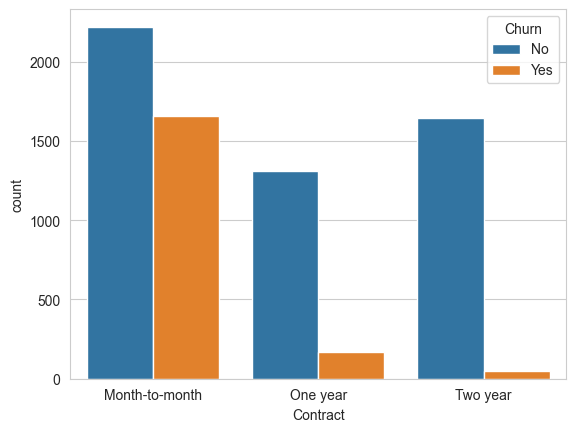

In [ ]:
sns.countplot(df, x='Contract', hue='Churn')

<Axes: xlabel='tenure', ylabel='TotalCharges'>

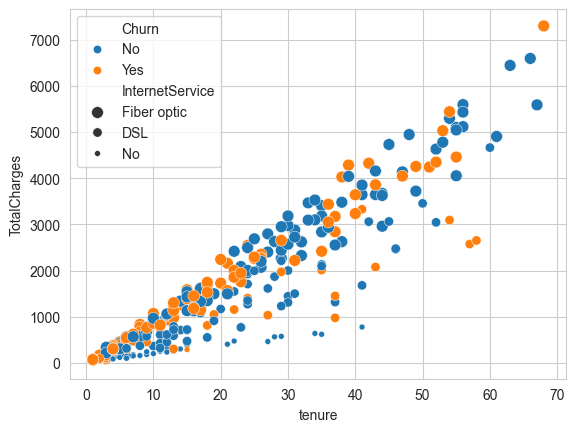

In [81]:
plot_samples_mtm = plot_samples[plot_samples.Contract == "Month-to-month"]
sns.scatterplot(plot_samples_mtm, x='tenure', y='TotalCharges', size='InternetService', hue='Churn')

<Axes: xlabel='InternetService', ylabel='count'>

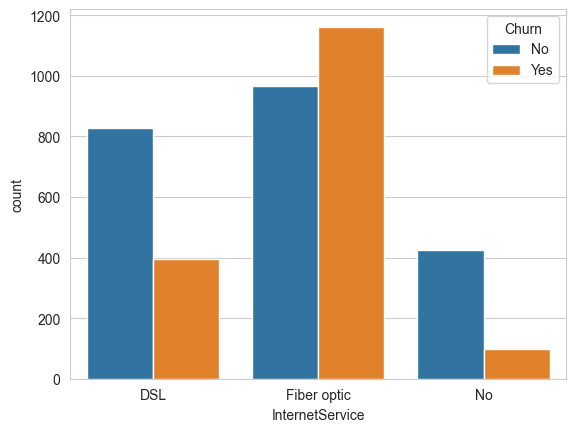

In [84]:
sns.countplot(df[df.Contract == "Month-to-month"], x='InternetService', hue='Churn')

### Conclusion
- Most of the churners has month-to-month subscription and tend to leave cause of the high charges.
- Telecommunication service provide also internet service. I guess that most of the customers came for the internet services and leave because of the high charges for it.

---

### remove unimportant features

In [85]:
model3, f13 = fit_predict([X_train, X_test, X_val, y_train, y_test, y_val], {"ignored_features": ["gender", "Partner", "Dependents"]})
print(f"f1: {f13:.4f}")

0:	learn: 0.6924647	test: 0.6925744	best: 0.6925744 (0)	total: 8.31ms	remaining: 1m 23s
500:	learn: 0.5068136	test: 0.5271601	best: 0.5271601 (500)	total: 1.75s	remaining: 33.1s
1000:	learn: 0.4473103	test: 0.4864890	best: 0.4864890 (1000)	total: 3.57s	remaining: 32.1s
1500:	learn: 0.4249430	test: 0.4738960	best: 0.4738960 (1500)	total: 5.37s	remaining: 30.4s
2000:	learn: 0.4141351	test: 0.4696277	best: 0.4695614 (1991)	total: 7.17s	remaining: 28.7s
2500:	learn: 0.4072104	test: 0.4681205	best: 0.4681205 (2500)	total: 8.98s	remaining: 26.9s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4679245189
bestIteration = 2583

Shrink model to first 2584 iterations.
f1: 0.6344


In [86]:
(f13 - f12) / f12 * 100

0.7084999695487154

Conclusion: By removing less important features (`gender`, `Partner`, `Dependent`) we've got increase for 0.7% in f1 score

In [33]:
df.apply(lambda x: pd.factorize(x)[0]).corr().abs().style.background_gradient(cmap='coolwarm').set_table_styles(stick_style)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,0.010517,0.000013,0.006488,0.009451,0.000863,0.003429,0.012230,0.005092,0.000985,0.001156,0.000191,0.000126,0.011754,0.005209,0.008072,0.012329,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,0.211185,0.010834,0.008576,0.113791,0.032310,0.210897,0.144828,0.157095,0.223770,0.130130,0.120802,0.142554,0.156530,0.093704,0.049649,0.024043,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.101985,0.017706,0.117307,0.000891,0.081850,0.090753,0.094451,0.069072,0.080127,0.075779,0.294806,0.014877,0.133115,0.036054,0.042334,0.150448
Dependents,0.010517,0.211185,0.452676,1.000000,0.048514,0.001762,0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,0.029390,0.005687,0.164221
tenure,0.000013,0.010834,0.101985,0.048514,1.000000,0.018799,0.063510,0.012008,0.017083,0.064613,0.037174,0.033108,0.027090,0.031491,0.122446,0.011129,0.075379,0.041647,0.107315,0.144351
PhoneService,0.006488,0.008576,0.017706,0.001762,0.018799,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,0.004070,0.141829,0.029676,0.011942
MultipleLines,0.009451,0.113791,0.117307,0.019657,0.063510,0.675070,1.000000,0.186826,0.066844,0.130619,0.013069,0.066684,0.030195,0.028187,0.083343,0.133255,0.025676,0.024338,0.015448,0.036310
InternetService,0.000863,0.032310,0.000891,0.044590,0.012008,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,0.289963,0.038341,0.047291
OnlineSecurity,0.003429,0.210897,0.081850,0.190523,0.017083,0.125353,0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,0.220566,0.027140,0.332819
OnlineBackup,0.012230,0.144828,0.090753,0.062775,0.064613,0.129770,0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,0.284344,0.054672,0.074205
